# Volumetrics: HCIP calculation

We'll implement the volumetric equation:

$$ V = A \times T \times G \times \phi \times N\!\!:\!\!G \times S_\mathrm{O} \times \frac{1}{B_\mathrm{O}} $$

## Gross rock volume 

$$ \mathrm{GRV} = A \times T $$

In [1]:
thick = 80            # metres
area = 20000 * 30000  # metres

grv = thick * area
grv

48000000000

Let's make a **function** that computes the GRV:

In [2]:
def calculate_grv(thickness, area):
    return thickness * area

Now we can just call this function, instead of remembering the equation. (Admittedly, the equation is rather easy to remember in this case!)

In [3]:
calculate_grv(thick, area)

48000000000

It works!

Now we need to compensate for the prospect not being a flat slab of rock &mdash; using the geometric factor. 

We will implement the equations implied by this diagram:

<img src="http://subsurfwiki.org/images/6/66/Geometric_correction_factor.png", width=600>

In [6]:
top = input("What shape is the prospect? ")

What shape is the prospect? slab


In [7]:
height = 100
ratio = thick / height

if top == 'round':
    g = -0.6 * ratio + 1

if top == 'flat':
    g = -0.3 * ratio + 1

if top == 'slab':
    g = 1

g

1

In [8]:
height = 100
ratio = thick / height

if top == 'round':
    g = -0.6 * ratio + 1
elif top == 'flat':
    g = -0.3 * ratio + 1
else:
    g = 1

g

1

Let's turn this one into a function too. It's a little trickier:

In [9]:
def geometric_factor(thick, height, top='slab'):

    ratio = thick / height

    if top == 'round':
        g = -0.6 * ratio + 1
    elif top == 'flat':
        g = -0.3 * ratio + 1
    else:
        g = 1

    return g

In [10]:
geometric_factor(thick, height=100, top='round')

0.52

In [11]:
grv *= g

What if we have multiple prospects?

Let's try passing lists to our function:

In [56]:
thicknesses = [10, 25, 15, 5, 100]
heights = [75, 100, 20, 100, 200]

geometric_factor(thicknesses, heights, top='round')

TypeError: unsupported operand type(s) for /: 'list' and 'list'

That doesn't work, we need another approach.

In [12]:
import numpy as np

thicknesses = np.array([10, 25, 15, 5, 100])
heights = np.array([75, 100, 20, 100, 200])

In [13]:
geometric_factor(thicknesses, heights, top='round')

array([0.92, 0.85, 0.55, 0.97, 0.7 ])

Well, that's convenient!

## HC pore volume

We need:

- net:gross &mdash; the ratio of reservoir-quality rock thickness to the total thickness of the interval.
- porosity
- $S_\mathrm{O}$ &mdash; the oil saturation, or proportion of oil to total pore fluid.

In [14]:
netg = 0.5   # fraction
por = 0.24   # fraction
s_o = 0.8    # fraction

hcpv = netg * por * s_o

In [15]:
hcpv

0.096

### EXERCISE

Turn this into a function by rearranging the following lines of code:

    """A function to compute the hydrocarbon pore volume."""
    return hcpv
    hcpv = netg * por * s_o
    def calculate_hcpv(netg, por, s_o):


In [16]:
# Put your code here:




In [17]:
def calculate_hcpv(netg, por, s_o):
    hcpv = netg * por * s_o
    return hcpv

After you define the function and run that cell, this should work:

In [18]:
calculate_hcpv(0.5, 0.24, 0.8)

0.096

You should get: `0.096`.

## Formation volume factor

Oil shrinks when we produce it, especially if it has high GOR. The FVF, or $B_O$, is the ratio of a reservoir barrel to a stock-tank barrel (25 deg C and 1 atm). Typically the FVF is between 1 (heavy oil) and 1.7 (high GOR).

In [19]:
fvf = 1.1

We could define something to remember the FVF for different types of oil:

In [20]:
fvfs = {
    'Brent': 1.9,
    'Forties': 1.2,
    'Statfjord': 1.6,
    'Gullfaks': 1.2,
}

Then access them by key:

In [21]:
fvfs['Brent']

1.9

### EXERCISE

For gas, $B_\mathrm{G}$ is $0.35 Z T / P$, where $Z$ is the correction factor, or gas compressibility factor. $T$ should be in kelvin and $P$ in kPa. $Z$ is usually between 0.8 and 1.2, but it can be as low as 0.3 and as high as 2.0.

Can you write a function to calculate $B_\mathrm{G}$?

In [22]:
def calculate_Bg(     ):  # Add the arguments.
    """Write a docstring."""
    
    
    return         # Don't forget to return something!

## Put it all together

Now we have the components of the volumetric equation:

In [23]:
hcip = grv * hcpv / fvf
hcip

4189090909.0909085

In [24]:
print("HCIP", hcip)

HCIP 4189090909.0909085


[For more on conversion to bbl, BOE, etc.](https://en.wikipedia.org/wiki/Barrel_of_oil_equivalent)

In [25]:
print("HCIP is {:.0f} Mm³ or {:.0f} million bbl".format(hcip/1000000, 6.29*hcip/1000000))

HCIP is 4189 Mm³ or 26349 million bbl


### EXERCISE

Can you write a function to compute the volume (i.e. the HCIP), given all the inputs?

Try to use the functions for calculating GRV and HCPV that you have already written.

As a reminder, here's the equation:

$$ V = A \times T \times G \times \phi \times N\!\!:\!\!G \times S_\mathrm{O} \times \frac{1}{B_\mathrm{O}} $$

In [26]:
# Put your code here.


    

In [27]:
def calculate_hcip(a, t, g, phi, ng, so, bo):
    """
    Function to compute HCIP from area, thickness, height, etc.
    """
    grv = calculate_grv(t, a)
    hcpv = calculate_hcpv(ng, phi, so)
    return  g * grv * hcpv / bo

When you've defined the function, this should work:

In [28]:
calculate_hcip(area, thick, g, por, netg, s_o, fvf)

4189090909.0909085

You should get `4189090909`.

## Monte Carlo simulation

We can easily draw randomly from distributions of properties:

- Normal: https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html
- Uniform: https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.uniform.html
- Lognormal: https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.lognormal.html

In [29]:
import numpy as np

netg = np.random.normal(loc=0.5, scale=0.2, size=100)
por = np.random.normal(loc=0.24, scale=0.03, size=100)

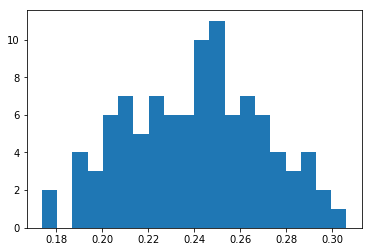

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt

_ = plt.hist(por, bins=20)

In [31]:
hcpv = netg * por * s_o

In [32]:
hcpv

array([0.10463467, 0.13844973, 0.09632187, 0.09811486, 0.13546228,
       0.05473382, 0.0539462 , 0.05318151, 0.05836087, 0.08110308,
       0.15570742, 0.07379856, 0.08406683, 0.04091922, 0.09326368,
       0.03891135, 0.08486708, 0.10266718, 0.0859999 , 0.11052744,
       0.11422104, 0.06985316, 0.04204137, 0.10516404, 0.11267607,
       0.11430329, 0.0364055 , 0.13537027, 0.13276175, 0.0625544 ,
       0.03664434, 0.10680863, 0.07817438, 0.09562748, 0.04337794,
       0.01403742, 0.15192367, 0.02246021, 0.09327783, 0.07897611,
       0.08602473, 0.13025703, 0.10737067, 0.13135462, 0.07621068,
       0.06144338, 0.06696551, 0.09335605, 0.01353477, 0.04372606,
       0.0755155 , 0.12744285, 0.09269303, 0.10077561, 0.16669723,
       0.10600953, 0.1263897 , 0.06936494, 0.0417649 , 0.10232121,
       0.06856065, 0.0730744 , 0.04087821, 0.05763923, 0.05936807,
       0.09958708, 0.09224573, 0.09070145, 0.14499421, 0.10042492,
       0.07575852, 0.06648375, 0.09956885, 0.09931854, 0.12380

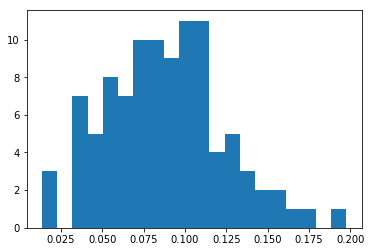

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt

_ = plt.hist(hcpv, bins=20)

The histogram looks a bit ragged, but this is probably because of the relatively small number of samples.

### EXERCISE

1. How does the histogram look if you take 1000 or 10,000 samples instead of 100?
1. Make distributions for some of the other properties, like thickness and FVF.
1. Maybe our functions should check that we don't get unreasonable values, like negative numbers, or decimal fractions over 1.0 Try to implement this if you have time.

----

## Full MC calculation

Remember how when we changed lists of multiple values into our functions, they didn't work, but if we used arrays they did? Well, our distributions are arrays, so we might just be able to pass them straight to our function:

In [34]:
calculate_hcip(area, thick, g, por, netg, s_o, fvf)

array([4.56587661e+09, 6.04144292e+09, 4.20313600e+09, 4.28137587e+09,
       5.91108150e+09, 2.38838505e+09, 2.35401605e+09, 2.32064777e+09,
       2.54665602e+09, 3.53904352e+09, 6.79450549e+09, 3.22030064e+09,
       3.66837055e+09, 1.78556611e+09, 4.06968769e+09, 1.69794989e+09,
       3.70329056e+09, 4.48002227e+09, 3.75272272e+09, 4.82301568e+09,
       4.98419094e+09, 3.04813790e+09, 1.83453240e+09, 4.58897629e+09,
       4.91677417e+09, 4.98777986e+09, 1.58860378e+09, 5.90706615e+09,
       5.79323982e+09, 2.72964668e+09, 1.59902575e+09, 4.66074017e+09,
       3.41124575e+09, 4.17283529e+09, 1.89285547e+09, 6.12541967e+08,
       6.62939645e+09, 9.80081971e+08, 4.07030525e+09, 3.44623011e+09,
       3.75380642e+09, 5.68394331e+09, 4.68526539e+09, 5.73183813e+09,
       3.32555682e+09, 2.68116572e+09, 2.92213146e+09, 4.07371834e+09,
       5.90608071e+08, 1.90804609e+09, 3.29522187e+09, 5.56114240e+09,
       4.04478688e+09, 4.39748134e+09, 7.27406112e+09, 4.62587046e+09,
      

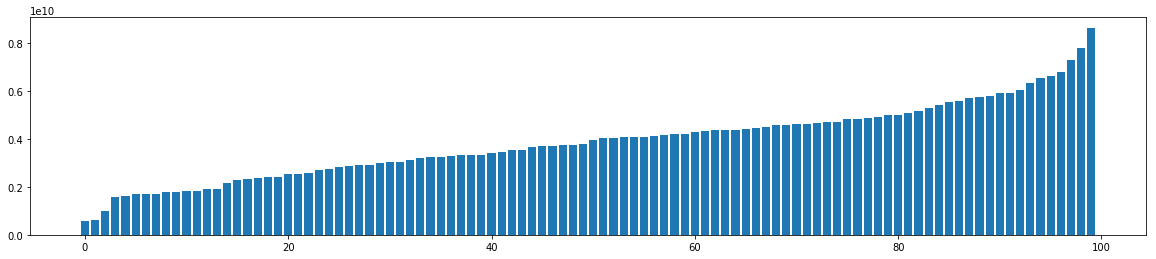

In [35]:
hcip = calculate_hcip(area, thick, g, por, netg, s_o, fvf)

plt.figure(figsize=(20,4))
plt.bar(np.arange(100), sorted(hcip))
plt.show()

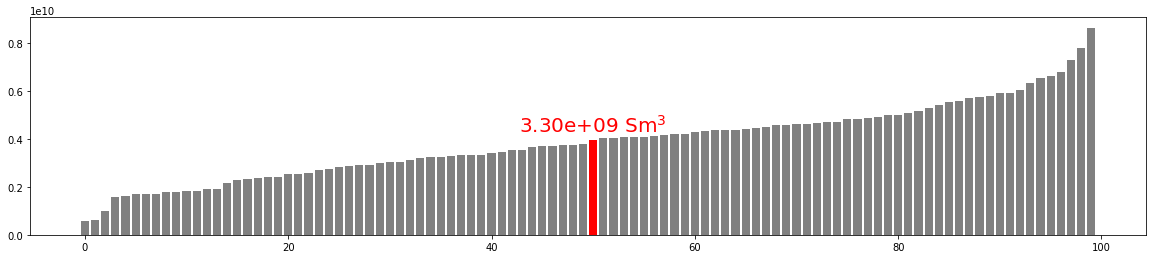

In [36]:
p = 50

cols = 100 * ['gray']
cols[p] = 'red'

plt.figure(figsize=(20,4))
plt.bar(np.arange(100), sorted(hcip), color=cols)
plt.text(p, hcip[p]*1.3, f'{hcip[50]:.2e} $\mathrm{{Sm}}^3$', ha='center', color='red', size=20)
plt.show()

### Lognormal distributions

We might prefer a lognormal distribution for some parameters, e.g. area and porosity.

This is a little trickier, and involves using `scipy`. The good news is that this gives us access to 97 other continuous distributions, as well as multivariate distributions and other useful things.

In [37]:
import scipy.stats

dist = scipy.stats.lognorm(s=0.2, scale=0.15)

This has instantiated a continuous distribution, from which we can now sample random variables:

In [38]:
samples = dist.rvs(size=10000)

These have a lognormal distribution.

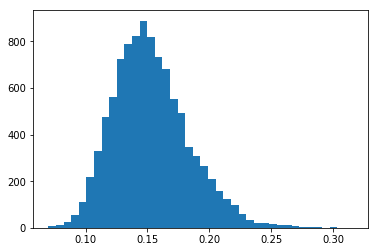

In [39]:
_ = plt.hist(samples, bins=40)

# Reading data from a file

Let's try reading data from a CSV.

In [40]:
ls ../data

churchmanbible.csv                    model_performance.jpg
crosshcattle.csv                      newby.csv
HC_volumes_random_input.csv           nolan.csv
lukegu.csv                            recruitf9.csv
ML_classifier_comparison_sklearn.png  shankle.csv
ML_loop.png                           shrimplin.csv


In [41]:
!head -5 ../data/HC_volumes_random_input.csv

Index,Name,Thick [m],Area [km2],GeomFactor,N:G,phi,So,Bo
0,Prospect_1,173,65.71485384739277,0.73,0.26,0.150557324267673,0.45,1.1
1,Prospect_2,410,40.6848690615174,0.43,0.59,0.1631222974216735,0.38,1.23
2,Prospect_3,160,13.883810284557013,0.55,0.16,0.16780987275649162,0.59,1.29
3,Prospect_4,11,5.572679283963141,0.67,0.12,0.17676582709753452,0.29,1.2


In [42]:
with open('../data/HC_volumes_random_input.csv') as f:
    for line in f:
        data = line.split(',')
        print(data)

['Index', 'Name', 'Thick [m]', 'Area [km2]', 'GeomFactor', 'N:G', 'phi', 'So', 'Bo\n']
['0', 'Prospect_1', '173', '65.71485384739277', '0.73', '0.26', '0.150557324267673', '0.45', '1.1\n']
['1', 'Prospect_2', '410', '40.6848690615174', '0.43', '0.59', '0.1631222974216735', '0.38', '1.23\n']
['2', 'Prospect_3', '160', '13.883810284557013', '0.55', '0.16', '0.16780987275649162', '0.59', '1.29\n']
['3', 'Prospect_4', '11', '5.572679283963141', '0.67', '0.12', '0.17676582709753452', '0.29', '1.2\n']
['4', 'Prospect_5', '257', '49.99581426847227', '0.81', '0.31', '0.17925532180157155', '0.14', '1.28\n']
['5', 'Prospect_6', '423', '3.0311172449878763', '0.93', '0.08', '0.18038583649470907', '0.73', '1.29\n']
['6', 'Prospect_7', '466', '8.382403728483991', '0.72', '0.53', '0.18398791462326147', '0.21', '1.33\n']
['7', 'Prospect_8', '66', '0.6368698740979926', '0.67', '0.38', '0.16910814310209066', '0.64', '1.37\n']
['8', 'Prospect_9', '191', '157.90441500174487', '0.51', '0.03', '0.1586415347

In [43]:
import csv
with open('../data/HC_volumes_random_input.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        print(row)

OrderedDict([('Index', '0'), ('Name', 'Prospect_1'), ('Thick [m]', '173'), ('Area [km2]', '65.71485384739277'), ('GeomFactor', '0.73'), ('N:G', '0.26'), ('phi', '0.150557324267673'), ('So', '0.45'), ('Bo', '1.1')])
OrderedDict([('Index', '1'), ('Name', 'Prospect_2'), ('Thick [m]', '410'), ('Area [km2]', '40.6848690615174'), ('GeomFactor', '0.43'), ('N:G', '0.59'), ('phi', '0.1631222974216735'), ('So', '0.38'), ('Bo', '1.23')])
OrderedDict([('Index', '2'), ('Name', 'Prospect_3'), ('Thick [m]', '160'), ('Area [km2]', '13.883810284557013'), ('GeomFactor', '0.55'), ('N:G', '0.16'), ('phi', '0.16780987275649162'), ('So', '0.59'), ('Bo', '1.29')])
OrderedDict([('Index', '3'), ('Name', 'Prospect_4'), ('Thick [m]', '11'), ('Area [km2]', '5.572679283963141'), ('GeomFactor', '0.67'), ('N:G', '0.12'), ('phi', '0.17676582709753452'), ('So', '0.29'), ('Bo', '1.2')])
OrderedDict([('Index', '4'), ('Name', 'Prospect_5'), ('Thick [m]', '257'), ('Area [km2]', '49.99581426847227'), ('GeomFactor', '0.81')

In [44]:
row

OrderedDict([('Index', '99'),
             ('Name', 'Prospect_100'),
             ('Thick [m]', '400'),
             ('Area [km2]', '1.6642965805636856'),
             ('GeomFactor', '0.48'),
             ('N:G', '0.08'),
             ('phi', '0.160077413180711'),
             ('So', '0.58'),
             ('Bo', '1.19')])

In [45]:
row['phi']

'0.160077413180711'

## Using `pandas`

In [46]:
import pandas as pd

df = pd.read_csv('../data/HC_volumes_random_input.csv')

In [47]:
df.head()

,Index,Name,Thick [m],Area [km2],GeomFactor,N:G,phi,So,Bo
0,0,Prospect_1,173,65.714854,0.73,0.26,0.150557,0.45,1.10
1,1,Prospect_2,410,40.684869,0.43,0.59,0.163122,0.38,1.23
2,2,Prospect_3,160,13.883810,0.55,0.16,0.167810,0.59,1.29
3,3,Prospect_4,11,5.572679,0.67,0.12,0.176766,0.29,1.20
4,4,Prospect_5,257,49.995814,0.81,0.31,0.179255,0.14,1.28


In [48]:
df[['Name', 'Thick [m]']]

,Name,Thick [m]
0,Prospect_1,173
1,Prospect_2,410
2,Prospect_3,160
3,Prospect_4,11
4,Prospect_5,257
5,Prospect_6,423
6,Prospect_7,466
7,Prospect_8,66
8,Prospect_9,191
9,Prospect_10,270


In [49]:
calculate_grv(df['Thick [m]'], df['Area [km2]'])

0     11368.669716
1     16680.796315
2      2221.409646
3        61.299472
4     12848.924267
5      1282.162595
6      3906.200137
7        42.033412
8     30159.743265
9      4479.115518
10     7379.356686
11     3805.260863
12     6491.204084
13      116.285014
14    20236.994289
15     2043.836766
16    32265.914481
17     2712.922508
18     5306.490596
19     2294.222689
20     7091.056433
21      280.544243
22     2241.512796
23     4460.161648
24      791.130255
25     5711.982724
26     6354.521696
27      711.764794
28      649.467967
29     3942.610347
          ...     
70    17138.811635
71     1205.068380
72    14641.460948
73     5062.193229
74     1674.881345
75     2278.156852
76      563.841632
77     3332.752079
78     4500.916800
79     4118.778579
80     4003.213456
81      589.289295
82     5023.468410
83     2306.064687
84      515.423776
85     7392.580049
86     6386.940101
87     3323.897093
88     6230.898353
89     6824.903684
90     2030.788427
91     3431.

In [50]:
df['GRV'] = calculate_grv(df['Thick [m]'], df['Area [km2]'])

We could also compute a distribution for each row in the dataframe:

In [51]:
df.columns

Index(['Index', 'Name', 'Thick [m]', 'Area [km2]', 'GeomFactor', 'N:G', 'phi',
       'So', 'Bo', 'GRV'],
      dtype='object')

In [52]:
def wrapper(row):
    _, name, thick, area, g, netg, por, s_o, fvf, grv = row
    area *= 1000000
    return calculate_hcip(area, thick, g, por, netg, s_o, fvf)

In [53]:
df.apply(wrapper, axis=1)

0     1.329008e+08
1     2.132697e+08
2     1.500345e+07
3     2.105367e+05
4     6.325627e+07
5     9.737593e+06
6     4.330318e+07
7     8.454287e+05
8     9.572856e+06
9     9.578398e+07
10    2.642014e+07
11    7.808704e+07
12    2.527927e+07
13    6.229452e+05
14    4.130222e+07
15    3.160981e+07
16    4.386205e+08
17    1.073283e+07
18    7.757953e+07
19    6.369744e+05
20    1.056212e+08
21    2.337172e+05
22    3.798761e+07
23    2.165674e+07
24    4.902495e+06
25    6.599424e+07
26    2.797774e+07
27    1.288899e+07
28    1.970615e+04
29    1.169186e+07
          ...     
70    7.135087e+07
71    1.770857e+06
72    1.481402e+08
73    8.469984e+07
74    4.136828e+07
75    3.550138e+07
76    1.402636e+07
77    9.925731e+07
78    1.510572e+07
79    1.403108e+06
80    1.547575e+08
81    1.104862e+06
82    9.666552e+06
83    1.474786e+07
84    1.061232e+07
85    2.204362e+08
86    6.818699e+07
87    8.526099e+06
88    1.530614e+07
89    9.038836e+07
90    5.237265e+07
91    2.7086

In [54]:
df['HCIP'] = df.apply(wrapper, axis=1)

In [55]:
df.head()

,Index,Name,Thick [m],Area [km2],GeomFactor,N:G,phi,So,Bo,GRV,HCIP
0,0,Prospect_1,173,65.714854,0.73,0.26,0.150557,0.45,1.10,11368.669716,1.329008e+08
1,1,Prospect_2,410,40.684869,0.43,0.59,0.163122,0.38,1.23,16680.796315,2.132697e+08
2,2,Prospect_3,160,13.883810,0.55,0.16,0.167810,0.59,1.29,2221.409646,1.500345e+07
3,3,Prospect_4,11,5.572679,0.67,0.12,0.176766,0.29,1.20,61.299472,2.105367e+05
4,4,Prospect_5,257,49.995814,0.81,0.31,0.179255,0.14,1.28,12848.924267,6.325627e+07


<hr />

<div>
<img src="https://avatars1.githubusercontent.com/u/1692321?s=50"><p style="text-align:center">© Agile Geoscience 2018</p>
</div>